# lab-customer-analysis-round-4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.


**Use the jupyter file from the last lab (Customer Analysis Round 3)**

### 1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
**Hint**: You can use np.number and np.object to select the numerical data types and categorical data types respectively


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data frame and checking data types
data = pd.read_csv('df_marketing.csv')
data.dtypes

Unnamed: 0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [3]:
#dropping column unnamed
data = data.drop(['Unnamed: 0'], axis=1)
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


In [4]:
#creating new data frames for only categorical (object) und numerial (float, integers) columns
numerical = data.select_dtypes(include=['float', 'int64']) #only work using 'int64' not 'int'!!
categorical = data.select_dtypes('object')

#checking if columns are correct
numerical.columns
#categorical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'effective_to_month'],
      dtype='object')

In [5]:
#create the same dataframes with np.number/object
numericals = data.select_dtypes(include=np.number)
categoricals = data.select_dtypes(include=np.object)

#checking results
#numericals

### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 


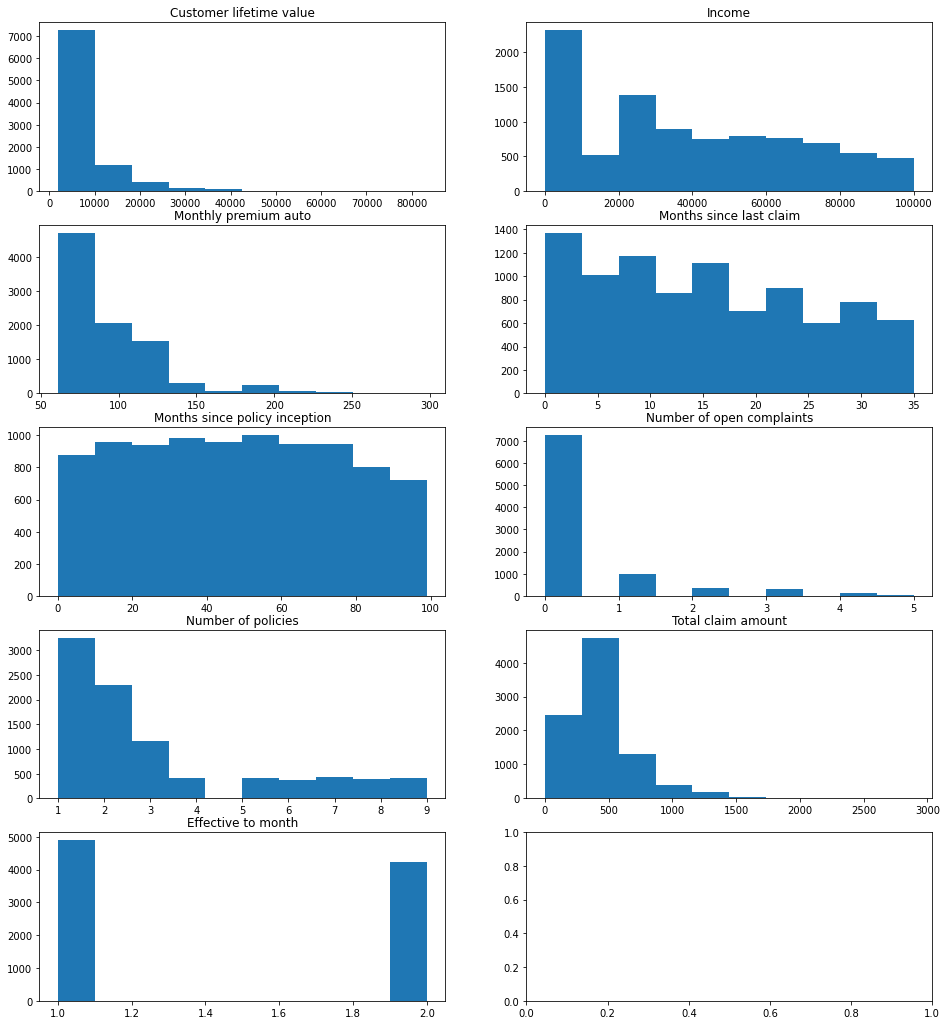

In [6]:
#distribution plots for the numerical values
#matplotlip = histograms with subplots

fig, axs = plt.subplots(5, 2, figsize=(16,18))

axs[0, 0].hist(data['customer_lifetime_value'])
axs[0, 1].hist(data['income'])
axs[1, 0].hist(data['monthly_premium_auto'])
axs[1, 1].hist(data['months_since_last_claim'])
axs[2, 0].hist(data['months_since_policy_inception'])
axs[2, 1].hist(data['number_of_open_complaints'])
axs[3, 0].hist(data['number_of_policies'])
axs[3, 1].hist(data['total_claim_amount'])
axs[4, 0].hist(data['effective_to_month'])

axs[0, 0].set_title('Customer lifetime value')
axs[0, 1].set_title('Income')
axs[1, 0].set_title('Monthly premium auto')
axs[1, 1].set_title('Months since last claim')
axs[2, 0].set_title('Months since policy inception')
axs[2, 1].set_title('Number of open complaints')
axs[3, 0].set_title('Number of policies')
axs[3, 1].set_title('Total claim amount')
axs[4, 0].set_title('Effective to month')

plt.show()

(array([7.260e+03, 1.193e+03, 4.130e+02, 1.540e+02, 7.500e+01, 2.000e+01,
        1.000e+01, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([ 1898.007675 , 10040.7450265, 18183.482378 , 26326.2197295,
        34468.957081 , 42611.6944325, 50754.431784 , 58897.1691355,
        67039.906487 , 75182.6438385, 83325.38119  ]),
 <BarContainer object of 10 artists>)

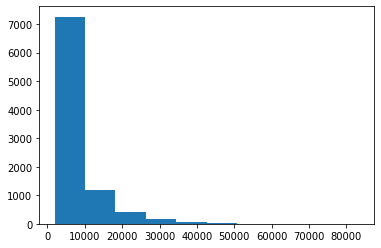

In [7]:
plt.hist(data['customer_lifetime_value'])

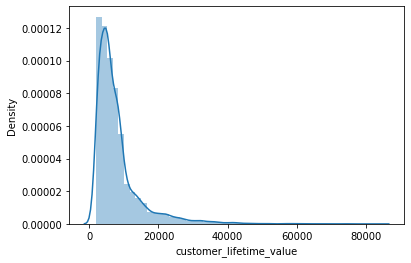

In [8]:
#creating distplots for all numerical columns with seaborn
sns.distplot(data['customer_lifetime_value'])
plt.show()

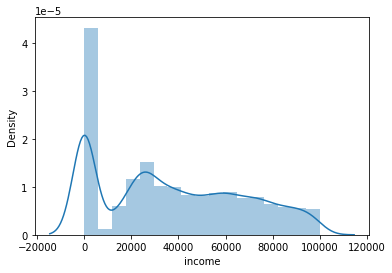

In [9]:
sns.distplot(data['income'])
plt.show()

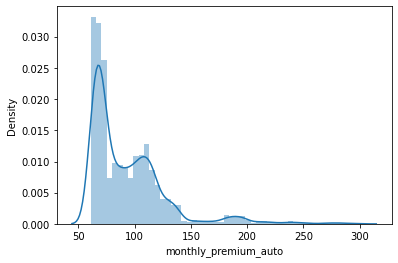

In [10]:
sns.distplot(data['monthly_premium_auto'])
plt.show()

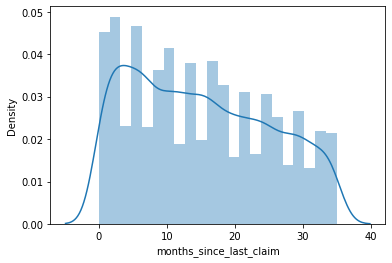

In [11]:
sns.distplot(data['months_since_last_claim'])
plt.show()

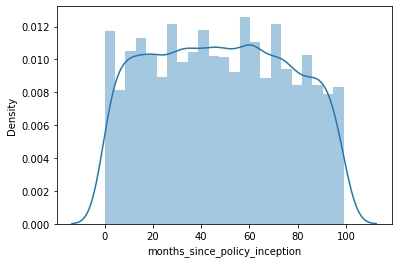

In [12]:
sns.distplot(data['months_since_policy_inception'])
plt.show()

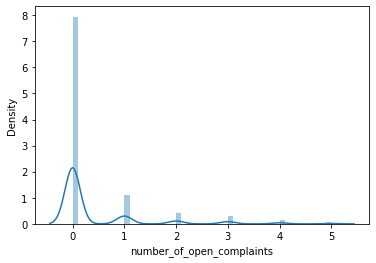

In [13]:
sns.distplot(data['number_of_open_complaints'])
plt.show()

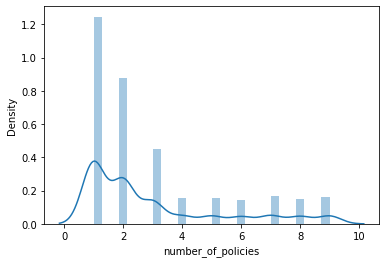

In [14]:
sns.distplot(data['number_of_policies'])
plt.show()

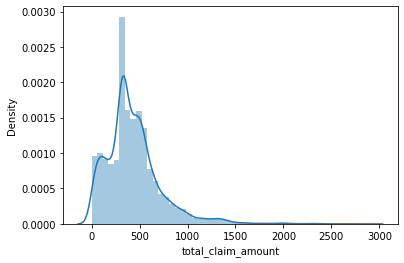

In [15]:
sns.distplot(data['total_claim_amount'])
plt.show()

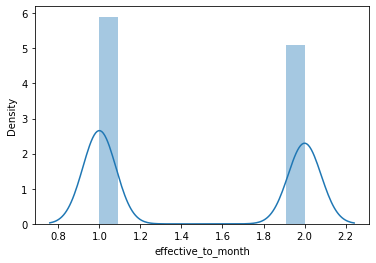

In [16]:
sns.distplot(data['effective_to_month'])
plt.show()

Variables which seem to be normally distributed: 
- total_claim_amount
- customer_lifetime_value


Variables which don't seem to be normally distributed:
- effective_to_month
- number_of_policies
- number_of_open_complaints
- months_since_policy_inception
- months_since_last_claim
- monthly_premium_auto
- income

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 


In [17]:
X = numerical.drop(['total_claim_amount'], axis=1)
y = numerical['total_claim_amount']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1229.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:35:15   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9125   BIC:                         1.229e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [18]:
#correclation maxtrix of X
corr_matrix = X.corr()
corr_matrix

#there are no pairs that have a high correlation --> no need to drop any features

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_month
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,NaN,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.006096
income,NaN,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169
monthly_premium_auto,NaN,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.011467
months_since_last_claim,NaN,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.020921
months_since_policy_inception,NaN,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.011010
number_of_open_complaints,NaN,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.006335
number_of_policies,NaN,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.009305
effective_to_month,NaN,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,1.000000


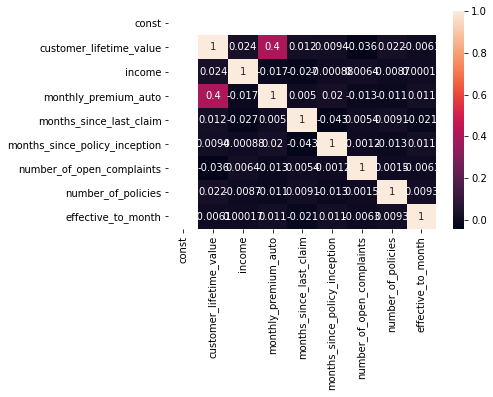

In [19]:
#creating a seaborn heatmap
sns_plot = sns.heatmap(corr_matrix, annot=True) 

plt.show()

#proof that there are no pairs with high correlation

## Lab | Customer Analysis Round 5
For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

1. Get the data
We are using the marketing_customer_analysis.csv file.

2. Dealing with the data
Already done in the round 2.

## 3. Explore the data
Some datasets have values that are missing, invalid, or otherwise difficult for an algorithm to process. If data is missing, the algorithm can’t use it. If data is invalid, the algorithm produces less accurate or even misleading outcomes. Some datasets are relatively clean but need to be shaped (e.g., aggregated or pivoted) and many datasets are just lacking useful business context (e.g., poorly defined ID values), hence the need for feature enrichment. Good data preparation produces clean and well-curated data which leads to more practical, accurate model outcomes.

### 3.1.- Determine the problems

### 3.2.- Data cleaning 
Cleaning the data is very important as the model learning from that data only, so if we feed inconsistent, appropriate data to model it will return garbage only, so it is required to make sure that the data does not contains any unseen problem.

   - Feature and Target Variables
   - Data Types
   - Missing data, check null values
   - Outliers
   - Duplicate data
### 3.3.- Feature selection (Which variables are important to answer our questions?)

### 3.4.- Data transformation

## 4. Processing Data
(Further processing...)

X-y split.
Normalize (numerical).

In [20]:
#determining the problems
#nohigh correclation between features = no feature needs to be dropped
#feature variables are not normally distributed --> outliers will needs to be deleted (check via boxplot)

In [22]:
#checking for null values

X.isna().sum()

const                            0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
effective_to_month               0
dtype: int64

In [23]:
#no need to drop or fill in any null values

#code to drop
# X = X.dropna()

#code to fill 
# X = X['customer_lifetime_value'].fillna(value=X.['customer_lifetime_value'}.mean(), inplace=True)

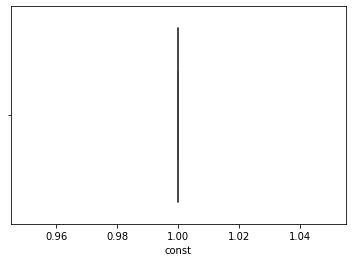

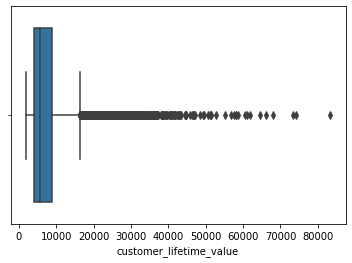

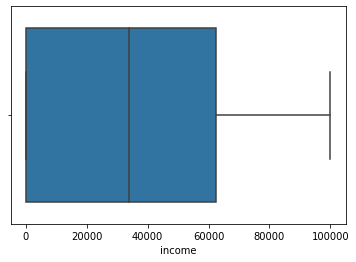

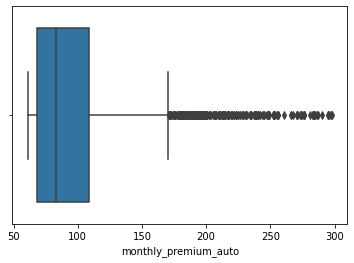

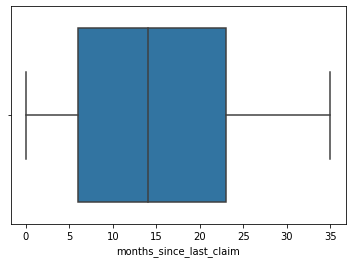

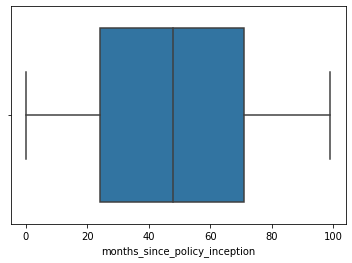

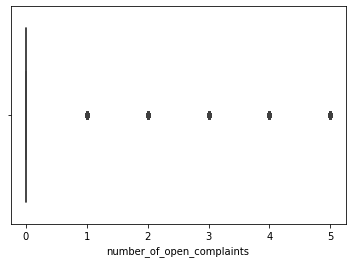

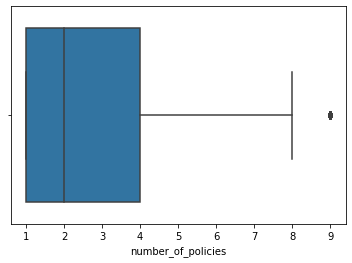

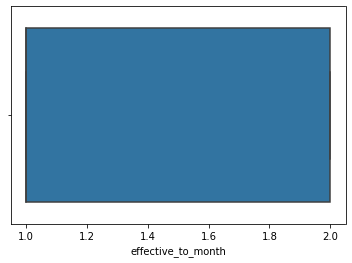

In [26]:
#checking for outliers via boxplot

for i in X.columns:
    sns.boxplot(X[i])
    plt.show()

In [32]:
#many outliers for monthly_premium_auto + customer_lifetime_value

#calculating iqr for monthly premium auto
iqr_auto = np.percentile(X['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25)


upper_limit_auto = np.percentile(X['monthly_premium_auto'],75) + 1.5*iqr_auto
lower_limit_auto = np.percentile(X['monthly_premium_auto'],25) - 1.5*iqr_auto

#showing iqr + lower and upper limits
iqr_auto, upper_limit_auto, lower_limit_auto

(41.0, 170.5, 6.5)

In [31]:
#cutting off outliers at the upper and lower limits
X.loc[X['monthly_premium_auto'] > upper_limit_auto, 'monthly_premium_auto'] = upper_limit_auto
X.loc[X['monthly_premium_auto'] < lower_limit_auto, 'monthly_premium_auto'] = lower_limit_auto

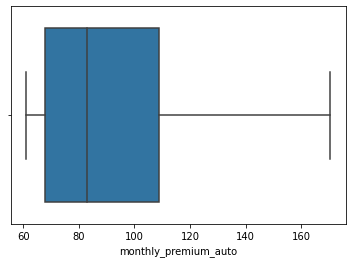

In [35]:
#checking boxplot again
sns.boxplot(X['monthly_premium_auto'])
plt.show()

In [33]:
#calculating iqr for customer lifetime value
iqr_life = np.percentile(X['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)


upper_limit_life = np.percentile(X['customer_lifetime_value'],75) + 1.5*iqr_life
lower_limit_life = np.percentile(X['customer_lifetime_value'],25) - 1.5*iqr_life

#showing iqr + lower and upper limits
iqr_life, upper_limit_life, lower_limit_life

(4967.915247000001, 16414.039911750002, -3457.6210762500014)

In [34]:
#cutting off outliers at the upper and lower limits
X.loc[X['customer_lifetime_value'] > upper_limit_life, 'customer_lifetime_value'] = upper_limit_life
X.loc[X['customer_lifetime_value'] < lower_limit_life, 'customer_lifetime_value'] = lower_limit_life

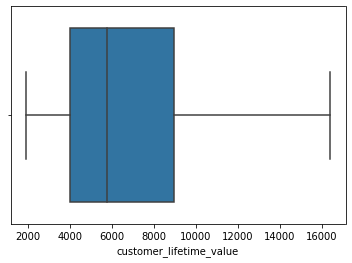

In [36]:
#checking boxplot again
sns.boxplot(X['customer_lifetime_value'])
plt.show()

In [47]:
#checking on rows
X.shape

(9134, 9)

In [48]:
#checking how many duplicate rows there are
X.duplicated().sum()

1090

In [50]:
#dropping duplicate rows --> why does the amount of rows not change
X.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
X

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_month
0,1.0,4809.216960,48029,61.0,7.0,52,0.0,9,2
1,1.0,2228.525238,0,64.0,3.0,26,0.0,1,1
2,1.0,14947.917300,22139,100.0,34.0,31,0.0,2,2
3,1.0,16414.039912,49078,97.0,10.0,3,0.0,2,1
4,1.0,5035.035257,37405,63.0,8.0,99,3.0,4,2
...,...,...,...,...,...,...,...,...,...
9129,1.0,2771.663013,59855,74.0,30.0,82,4.0,1,1
9130,1.0,16414.039912,0,170.5,14.0,32,0.0,2,2
9131,1.0,5259.444853,61146,65.0,7.0,68,0.0,6,1
9132,1.0,16414.039912,39837,170.5,11.0,63,0.0,2,2


In [51]:
model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:23:34   Log-Likelihood:                -61770.
No. Observations:                9134   AIC:                         1.236e+05
Df Residuals:                    9125   BIC:                         1.236e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [69]:
#(adjusted) R-squared is lower than before (0.519 VS 0.481)
#high p-value for months since last claim, number of policies and effective to month --> will drop them

#X = X.drop(['months_since_last_claim', 'effective_to_month', 'number_of_policies'], axis=1)
X = X.drop(['number_of_policies'], axis=1)

In [70]:
# sklearn's LR model

lm = LinearRegression()
model1 = lm.fit(X,y)

In [71]:
# evaluating sklearn's LR model

predictions = lm.predict(X) 

rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True

# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse, good to see if the errors are big, the values returnes are in the unit of the target

print("R2_score:", round(lm.score(X,y),2)) 
print("RMSE:", rmse)

R2_score: 0.48
RMSE: 209.28660197019929


In [72]:
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     1691.
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:43:00   Log-Likelihood:                -61770.
No. Observations:                9134   AIC:                         1.236e+05
Df Residuals:                    9128   BIC:                         1.236e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [73]:
#r-squared didn't change after dropping columns

In [78]:
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

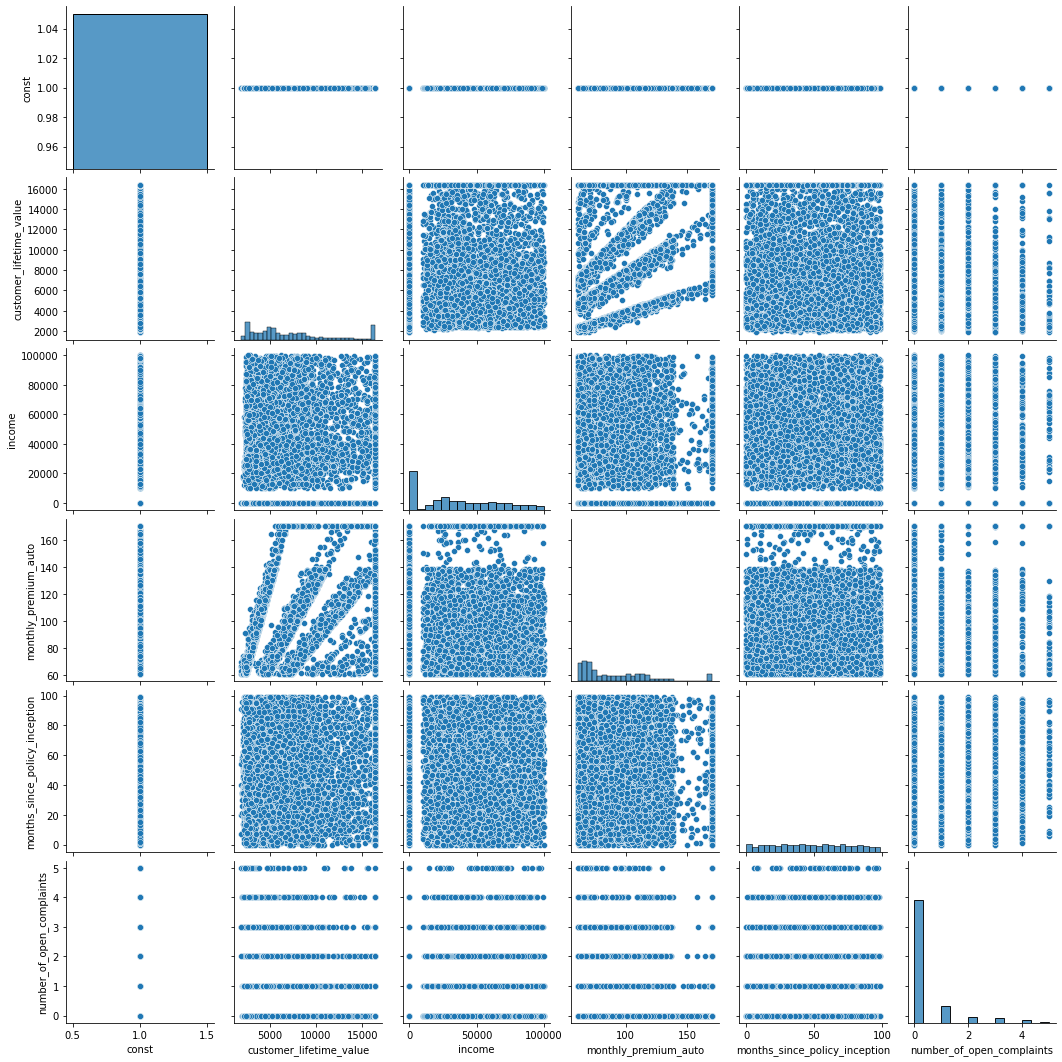

In [75]:
sns.pairplot(X)

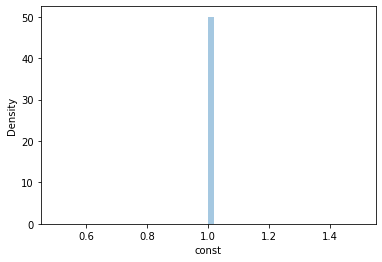

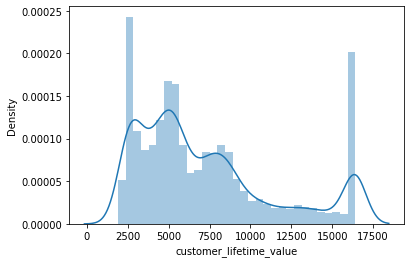

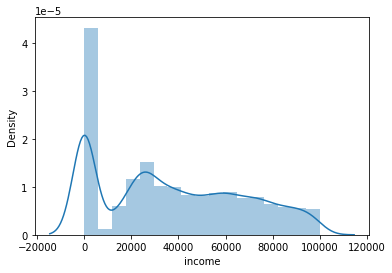

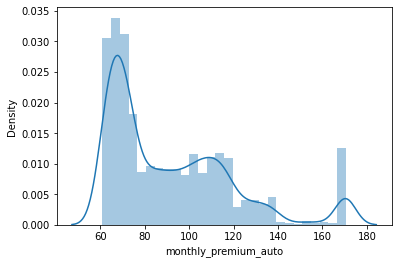

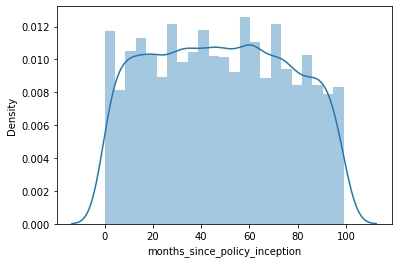

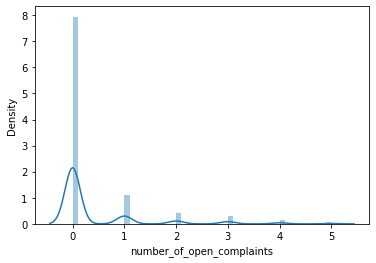

In [79]:
#checking distplots

for i in X.columns:
    sns.distplot(X[i])
    plt.show()

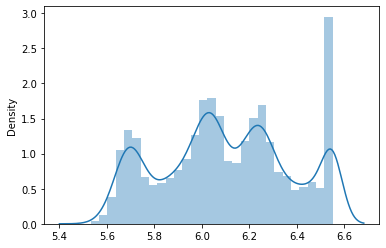

In [81]:
# BoxCox transformation customer lifetime value

X1 = data.copy()

X1['customer_lifetime_value'] = np.where(X['customer_lifetime_value']<=0, np.NAN, X['customer_lifetime_value'])

X1['customer_lifetime_value'] = X1['customer_lifetime_value'].fillna(X['customer_lifetime_value'].mean())

transformed_data_life, _ci = stats.boxcox(X1['customer_lifetime_value'])

sns.distplot(transformed_data_life)
plt.show()

In [ ]:
# BoxCox transformation customer lifetime value

X1 = data.copy()

X1['customer_lifetime_value'] = np.where(X['customer_lifetime_value']<=0, np.NAN, X['customer_lifetime_value'])

X1['customer_lifetime_value'] = X1['customer_lifetime_value'].fillna(X['customer_lifetime_value'].mean())

transformed_data_life, _ci = stats.boxcox(X1['customer_lifetime_value'])

sns.distplot(transformed_data_life)
plt.show()

In [83]:
# Normalizing data
transformer = Normalizer() 
transformer.fit(X) 

x_normalized = transformer.transform(X)

#creating new data frame with normalized data
x_normalized = pd.DataFrame(x_normalized)
x_normalized.shape

(9134, 6)

In [84]:
x_normalized

,0,1,2,3,4,5
0,0.000021,0.099633,0.995023,0.001264,0.001077,0.000000
1,0.000449,0.999520,0.000000,0.028705,0.011661,0.000000
2,0.000037,0.559574,0.828771,0.003743,0.001160,0.000000
3,0.000019,0.317178,0.948364,0.001874,0.000058,0.000000
4,0.000026,0.133405,0.991057,0.001669,0.002623,0.000079
...,...,...,...,...,...,...
9129,0.000017,0.046257,0.998928,0.001235,0.001369,0.000067
9130,0.000061,0.999944,0.000000,0.010387,0.001949,0.000000
9131,0.000016,0.085698,0.996320,0.001059,0.001108,0.000000
9132,0.000023,0.380956,0.924583,0.003957,0.001462,0.000000


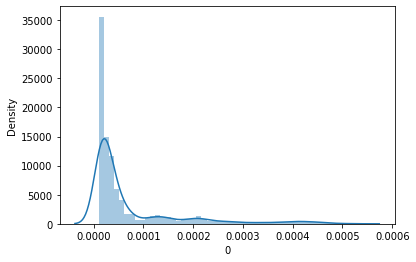

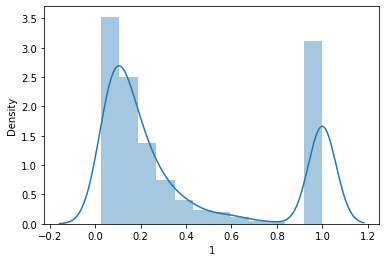

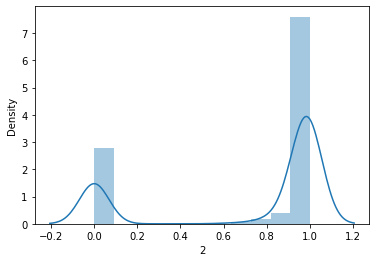

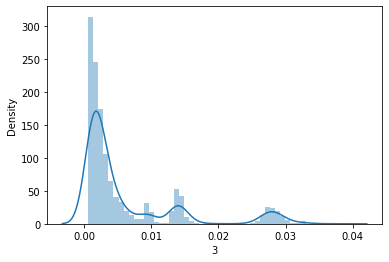

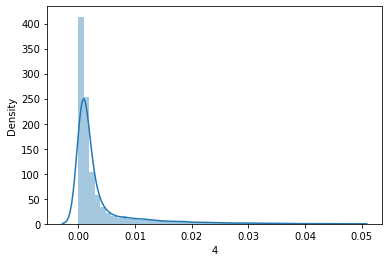

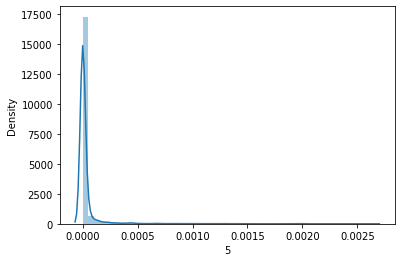

In [85]:
#checking distplots again

for i in x_normalized.columns:
    sns.distplot(x_normalized[i])
    plt.show()

In [86]:
model = sm.OLS(y,x_normalized).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     total_claim_amount   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.801
Method:                 Least Squares   F-statistic:                              6139.
Date:                Sat, 12 Jun 2021   Prob (F-statistic):                        0.00
Time:                        01:03:00   Log-Likelihood:                         -62741.
No. Observations:                9134   AIC:                                  1.255e+05
Df Residuals:                    9128   BIC:                                  1.255e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [87]:
#I am very surprised that the r-squared value is a lot higher 
#although the x_normalized distplots aren't close to a normal distribution at all